In [1]:
from infopath.model_loader import load_model_and_optimizer
from infopath.config import load_training_opt
import torch 
from infopath.utils.functions import run_with_perturbation
import os
from infopath.utils.plot_utils import plot_with_size, strip_right_top_axis
import numpy as np
import random 
import matplotlib.pyplot as plt 
%reload_ext autoreload
%autoreload 2
font = {"size": 6, "family":"arial"}
import matplotlib

matplotlib.rc("font", **font)
matplotlib.rcParams["pdf.fonttype"] = 42
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"

In [2]:
# set seed for reproducibility
seed = 1
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
np.random.seed(seed)
random.seed(seed)
torch.backends.cudnn.deterministic=True

In [3]:
os.chdir("..")

In [4]:
logs = {
    "nofb": 
    [
        "AllModels/1d74764c4551eef5158418ea67fbe1a5885dfdb1/2024_5_27_9_46_33_teacher_conf_block/",
        
        # Full
        "AllModels/4f811b0a7d426989a9069580e0108cc3e5ac7d60/2024_11_12_14_40_42_nofb_full_0",
        "AllModels/4f811b0a7d426989a9069580e0108cc3e5ac7d60/2024_11_12_14_40_42_nofb_full_1",
        "AllModels/4f811b0a7d426989a9069580e0108cc3e5ac7d60/2024_11_12_14_40_45_nofb_full_2",
        
        # no sparsity 
        "AllModels/4f811b0a7d426989a9069580e0108cc3e5ac7d60/2024_11_12_14_45_46_nofb_nosparsity_0",
        "AllModels/4f811b0a7d426989a9069580e0108cc3e5ac7d60/2024_11_12_14_40_47_nofb_nosparsity_1",
        "AllModels/4f811b0a7d426989a9069580e0108cc3e5ac7d60/2024_11_12_14_40_47_nofb_nosparsity_2",
        
        # with inh across
        "AllModels/4f811b0a7d426989a9069580e0108cc3e5ac7d60/2024_11_12_14_45_46_nofb_noinhacross_0",
        "AllModels/4f811b0a7d426989a9069580e0108cc3e5ac7d60/2024_11_12_14_45_46_nofb_noinhacross_1",
        "AllModels/4f811b0a7d426989a9069580e0108cc3e5ac7d60/2024_11_12_14_45_46_nofb_noinhacross_2",

        # no EI
        "AllModels/4f811b0a7d426989a9069580e0108cc3e5ac7d60/2024_11_12_14_40_45_nofb_noei_0",
        "AllModels/4f811b0a7d426989a9069580e0108cc3e5ac7d60/2024_11_12_14_40_46_nofb_noei_1",
        "AllModels/4f811b0a7d426989a9069580e0108cc3e5ac7d60/2024_11_12_14_40_46_nofb_noei_2",
        
        # no tm
        "AllModels/4f811b0a7d426989a9069580e0108cc3e5ac7d60/2024_11_12_15_36_6_nofb_notm_0",
        "AllModels/4f811b0a7d426989a9069580e0108cc3e5ac7d60/2024_11_12_15_5_48_nofb_notm_1",
        "AllModels/4f811b0a7d426989a9069580e0108cc3e5ac7d60/2024_11_12_15_46_19_nofb_notm_2",

        # no spike
        "AllModels/4f811b0a7d426989a9069580e0108cc3e5ac7d60/2024_11_12_14_40_47_nofb_nospike_0",
        "AllModels/4f811b0a7d426989a9069580e0108cc3e5ac7d60/2024_11_12_14_40_47_nofb_nospike_1",
        "AllModels/4f811b0a7d426989a9069580e0108cc3e5ac7d60/2024_11_12_14_45_45_nofb_nospike_2",

        # no spike + reset 
        "AllModels/4f811b0a7d426989a9069580e0108cc3e5ac7d60/2024_11_12_14_45_45_nofb_nospikereset_0",
        "AllModels/4f811b0a7d426989a9069580e0108cc3e5ac7d60/2024_11_12_14_45_45_nofb_nospikereset_1",
        "AllModels/4f811b0a7d426989a9069580e0108cc3e5ac7d60/2024_11_12_14_45_45_nofb_nospikereset_2",

        # sigmoid
        "AllModels/4f811b0a7d426989a9069580e0108cc3e5ac7d60/2024_11_12_14_45_54_nofb_sigmoid_0",
        "AllModels/4f811b0a7d426989a9069580e0108cc3e5ac7d60/2024_11_12_14_45_54_nofb_sigmoid_1",
        "AllModels/4f811b0a7d426989a9069580e0108cc3e5ac7d60/2024_11_12_14_45_54_nofb_sigmoid_2",
        ],
    "withfb1":
    [
        "AllModels/1d74764c4551eef5158418ea67fbe1a5885dfdb1/2024_5_27_9_46_33_teacher_conf/",

        # Full
        "AllModels/4f811b0a7d426989a9069580e0108cc3e5ac7d60/2024_11_12_14_45_44_withfb1_full_0",
        "AllModels/4f811b0a7d426989a9069580e0108cc3e5ac7d60/2024_11_12_14_45_54_withfb1_full_1",
        "AllModels/4f811b0a7d426989a9069580e0108cc3e5ac7d60/2024_11_12_14_46_5_withfb1_full_2",
        
        # no sparsity 
        "AllModels/4f811b0a7d426989a9069580e0108cc3e5ac7d60/2024_11_12_14_49_26_withfb1_nosparsity_0",
        "AllModels/4f811b0a7d426989a9069580e0108cc3e5ac7d60/2024_11_12_14_49_38_withfb1_nosparsity_1",
        "AllModels/4f811b0a7d426989a9069580e0108cc3e5ac7d60/2024_11_12_15_2_32_withfb1_nosparsity_2",

        # with inh across
        "AllModels/4f811b0a7d426989a9069580e0108cc3e5ac7d60/2024_11_12_14_46_5_withfb1_noinhacross_0",
        "AllModels/4f811b0a7d426989a9069580e0108cc3e5ac7d60/2024_11_12_14_46_5_withfb1_noinhacross_1",
        "AllModels/4f811b0a7d426989a9069580e0108cc3e5ac7d60/2024_11_12_14_49_25_withfb1_noinhacross_2",
        
        # no ei
        "AllModels/4f811b0a7d426989a9069580e0108cc3e5ac7d60/2024_11_12_14_46_5_withfb1_noei_0",
        "AllModels/4f811b0a7d426989a9069580e0108cc3e5ac7d60/2024_11_12_14_44_25_withfb1_noei_1",
        "AllModels/4f811b0a7d426989a9069580e0108cc3e5ac7d60/2024_11_12_14_49_36_withfb1_noei_2",

        # no tm
        "AllModels/4f811b0a7d426989a9069580e0108cc3e5ac7d60/2024_11_12_15_2_48_withfb1_notm_0",
        "AllModels/4f811b0a7d426989a9069580e0108cc3e5ac7d60/2024_11_12_15_3_54_withfb1_notm_1",
        "AllModels/4f811b0a7d426989a9069580e0108cc3e5ac7d60/2024_11_12_15_4_31_withfb1_notm_2",
        
        # no spike
        "AllModels/4f811b0a7d426989a9069580e0108cc3e5ac7d60/2024_11_12_15_1_30_withfb1_nospike_0",
        "AllModels/4f811b0a7d426989a9069580e0108cc3e5ac7d60/2024_11_12_15_7_46_withfb1_nospike_1",
        "AllModels/4f811b0a7d426989a9069580e0108cc3e5ac7d60/2024_11_12_15_7_46_withfb1_nospike_2",
        
        # no spike + reset 
        "AllModels/4f811b0a7d426989a9069580e0108cc3e5ac7d60/2024_11_12_15_54_23_withfb1_nospikereset_0",
        "AllModels/4f811b0a7d426989a9069580e0108cc3e5ac7d60/2024_11_12_15_7_46_withfb1_nospikereset_1",
        "AllModels/4f811b0a7d426989a9069580e0108cc3e5ac7d60/2024_11_12_15_3_42_withfb1_nospikereset_2",
        
        # sigmoid
        "AllModels/4f811b0a7d426989a9069580e0108cc3e5ac7d60/2024_11_12_15_6_2_withfb1_sigmoid_0",
        "AllModels/4f811b0a7d426989a9069580e0108cc3e5ac7d60/2024_11_12_15_6_30_withfb1_sigmoid_1",
        "AllModels/4f811b0a7d426989a9069580e0108cc3e5ac7d60/2024_11_12_15_6_40_withfb1_sigmoid_2",
        ]
}

In [5]:
trials = 100
dt = 0.001
opt = load_training_opt(logs["nofb"][0])
opt.device = DEVICE
m_teacher = load_model_and_optimizer(opt, reload=True, last_best="best")[0]

opt = load_training_opt(logs["nofb"][1])
opt.device = DEVICE
model_full = load_model_and_optimizer(opt, reload=True, last_best="best")[0]

opt = load_training_opt(logs["nofb"][22])
opt.device = DEVICE
model_sigma = load_model_and_optimizer(opt, reload=True, last_best="best")[0]


area_index = m_teacher.rsnn.area_index
excitatory_index = m_teacher.rsnn.excitatory_index

In [6]:
@torch.no_grad()
def run(model, trials=400, thr=8, seed=0):
    stims = torch.ones(trials)*4 
    torch.manual_seed(seed)
    spikes = model(stims)[0]
    filt = model.filter_fun2(model.filter_fun1(spikes))
    area0_active = (
        filt[:, :, model.rsnn.area_index == 0].mean((2)).max(0)[0] / model.timestep
        > thr
    )
    area1_active = (
        filt[:, :, model.rsnn.area_index == 1].mean((2)).max(0)[0] / model.timestep
        > thr
    )
    trial_type = area0_active * 2 + area1_active
    return spikes, model.filter_fun1(spikes), trial_type


def psth_plot(filt, filt1, trial_type, trial_type1, area_index, ax, area=0, dt=0.001, start=-0.048, stop=0.152, neurons_show=-1):
    time = torch.arange(0, filt.shape[0])/filt.shape[0] *(stop-start) + start
    neurons_show = area_index == area if neurons_show == -1 else (area_index == area) & (excitatory_index == neurons_show)
    ax.axvline(0, color="gold")
    ax.plot(time, filt[:, :, neurons_show][:,trial_type<=1].mean((1,2)).cpu()/dt, color="orange", alpha=0.7, linewidth=1)
    ax.plot(time, filt[:, :, neurons_show][:,trial_type==3].mean((1,2)).cpu()/dt, color="blue", alpha=0.7, linewidth=1)
    ax.axvline(0, color="gold")
    ax.plot(time, filt1[:, :, neurons_show][:,trial_type1<=1].mean((1,2)).cpu()/dt, color="red", alpha=0.7, linewidth=1)
    ax.plot(time, filt1[:, :, neurons_show][:,trial_type1==3].mean((1,2)).cpu()/dt, color="green", alpha=0.7, linewidth=1)
    ax.set_ylim(0, 16)
    return ax

def spike_plot(spikes, trial_type, area_index, ax, area=0, dt=0.001, start=-0.048, trial=0):
    ax.axvline(0, color="gold")
    hit_trial = torch.where(trial_type==3)[0][trial]
    tms, neurons = torch.where(spikes[:, hit_trial, area_index == area].cpu() > 0)
    color = ["red" if i else "black" for i in (neurons >= 200)]
    ax.scatter(tms*dt+start, neurons, marker="|", s=2, c=color, linewidth=0.5)
    strip_right_top_axis(ax)    
    return ax



In [7]:
area = 1
exc = 0
power = 0
torch.manual_seed(0)
__cached__, trial_type, _, spikes = run_with_perturbation(m_teacher, trials=trials, area=area, exc=exc, power=power)
_, trial_type_full, _, spikes_full = run_with_perturbation(model_full, trials=trials, area=area, exc=exc, power=power)
_, trial_type_sigma, _, spikes_sigma = run_with_perturbation(model_sigma, trials=trials, area=area, exc=exc, power=power)
filt = m_teacher.filter_fun1(spikes)
filt_full = m_teacher.filter_fun1(spikes_full)
filt_sigma = m_teacher.filter_fun1(spikes_sigma)

area = 1
exc = 0
power = 1
torch.manual_seed(0)
_, trial_type_light, _, spikes_light = run_with_perturbation(m_teacher, trials=trials, area=area, exc=exc, power=power)
_, trial_type_full_light, _, spikes_full_light = run_with_perturbation(model_full, trials=trials, area=area, exc=exc, power=power)
_, trial_type_sigma_light, _, spikes_sigma_light = run_with_perturbation(model_sigma, trials=trials, area=area, exc=exc, power=power)
filt_light = m_teacher.filter_fun1(spikes_light)
filt_full_light = m_teacher.filter_fun1(spikes_full_light)
filt_sigma_light = m_teacher.filter_fun1(spikes_sigma_light)

dp_refcirc = ((trial_type_light == 3)*1.).mean() - ((trial_type == 3)*1.).mean()
dp_biornn = ((trial_type_full_light == 3)*1.).mean() - ((trial_type_full == 3)*1.).mean()
dp_sigmarnn = ((trial_type_sigma_light == 3)*1.).mean() - ((trial_type_sigma == 3)*1.).mean()
print(dp_refcirc, dp_biornn, dp_sigmarnn)

tensor(0., device='cuda:0') tensor(0.0700, device='cuda:0') tensor(0.6200, device='cuda:0')


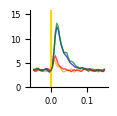

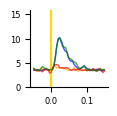

In [10]:
fig1, ax1 = plot_with_size(20, 20)
strip_right_top_axis(ax1) 
psth_plot(filt, filt_full, trial_type, trial_type_full, area_index, ax1, area=0)
fig1.savefig("Figures/Figure1/Figure1C_area1_full.pdf", transparent=True)


fig1, ax1 = plot_with_size(20, 20)
strip_right_top_axis(ax1) 
psth_plot(filt, filt_full, trial_type, trial_type_full, area_index, ax1, area=1)
fig1.savefig("Figures/Figure1/Figure1C_area2_full.pdf", transparent=True)


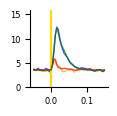

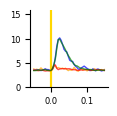

In [11]:
fig1, ax1 = plot_with_size(20, 20)
strip_right_top_axis(ax1) 
psth_plot(filt, filt_sigma, trial_type, trial_type_sigma, area_index, ax1, area=0)
fig1.savefig("Figures/Figure1/Figure1D_area1_sigma.pdf", transparent=True)


fig1, ax1 = plot_with_size(20, 20)
strip_right_top_axis(ax1) 
psth_plot(filt, filt_sigma, trial_type, trial_type_sigma, area_index, ax1, area=1)
fig1.savefig("Figures/Figure1/Figure1D_area2_sigma.pdf", transparent=True)


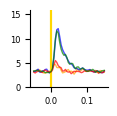

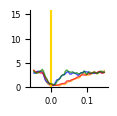

In [12]:
fig1, ax1 = plot_with_size(20, 20)
strip_right_top_axis(ax1) 
psth_plot(filt_light, filt_full_light, trial_type_light, trial_type_full_light, area_index, ax1, area=0, neurons_show=1)
fig1.savefig("Figures/Figure1/Figure1D_area1_full_light.pdf", transparent=True)


fig1, ax1 = plot_with_size(20, 20)
strip_right_top_axis(ax1) 
psth_plot(filt_light, filt_full_light, trial_type_light, trial_type_full_light, area_index, ax1, area=1, neurons_show=1)
fig1.savefig("Figures/Figure1/Figure1D_area2_full_light.pdf", transparent=True)


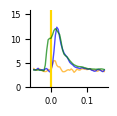

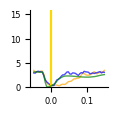

In [13]:
fig1, ax1 = plot_with_size(20, 20)
strip_right_top_axis(ax1) 
psth_plot(filt_light, filt_sigma_light, trial_type_light, trial_type_sigma_light, area_index, ax1, area=0)
fig1.savefig("Figures/Figure1/Figure1D_area1_sigma_light.pdf", transparent=True)


fig1, ax1 = plot_with_size(20, 20)
strip_right_top_axis(ax1) 
psth_plot(filt_light, filt_sigma_light, trial_type_light, trial_type_sigma_light, area_index, ax1, area=1, neurons_show=1)
fig1.savefig("Figures/Figure1/Figure1D_area2_sigma_light.pdf", transparent=True)


In [14]:
reposition = [(0, 200), (400,450), (200,400), (450, 500)]
r = []
for r1 in reposition:
    r.append([i for i in range(r1[0], r1[1])])
r = np.concatenate(r)

def spike_plot(spikes, r, ax, trial=0, alpha=1):
    ax.set_axis_off()
    ax.axvline(0, color="gold", linewidth=0.5)
    color = np.array(["black", "red"])
    tsp, neurid = torch.where(spikes[:,trial,r].cpu())
    tsp = tsp * model.timestep + model.opt.start
    c = ((neurid % 250) > 200).long()
    ax.set_xlim(-0.05, 0.15)
    ax.set_ylim(0, 250)
    ax.scatter(tsp, neurid, c=color[c], marker="|",s=0.25, linewidth=0.25, alpha=alpha)
    

def activity_plot(spikes, ax, r, area=0, trial=0, sigmoid=False):
    
    ax.axvline(50, color="gold", linewidth=0.5)
    sp = spikes[:, trial, r]
    # double the size of spikes for visualization
    sp[:,:-1] += sp[:,1:]
    sp[:,1:] += sp[:,:-1]
    if not sigmoid:
        sp[sp >0] = 1
    inh = sp[:, r]
    if area == 0:
        inh[:,:200] *= 0
        ax.pcolormesh(inh[:,:250].T, cmap="bwr", vmin=-0.5, vmax=0.5, rasterized=True)
        ax.pcolormesh(sp[:, r][:, :200].T, cmap="Greys", vmin=0, vmax=0.5, rasterized=True)
    else:
        inh[:,:400] *= 0
        ax.pcolormesh(inh[:,250:].T, cmap="bwr", vmin=-0.5, vmax=0.5,rasterized=True)
        ax.pcolormesh(sp[:, r][:,250:450].T, cmap="Greys", vmin=0, vmax=0.5,rasterized=True)
    strip_right_top_axis(ax)
    ax.set_xticks([50, 150])
    

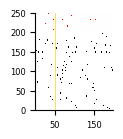

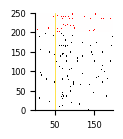

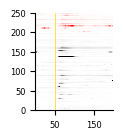

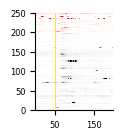

In [15]:
fig, ax = plot_with_size(20, 25)
activity_plot(spikes_full.cpu(), ax, r, area=0 ,trial=1)
fig.savefig("Figures/Figure1/Figure1B_area1.pdf", dpi=300, transparent=True)

fig, ax = plot_with_size(20, 25)
activity_plot(spikes_full.cpu(), ax, r, area=1 ,trial=1)
fig.savefig("Figures/Figure1/Figure1B_area2.pdf", dpi=300, transparent=True)

fig, ax = plot_with_size(20, 25)
activity_plot(spikes_sigma.cpu(), ax, r, area=0 ,trial=1, sigmoid=True)
fig.savefig("Figures/Figure1/Figure1B_area1_sigma.pdf", dpi=300, transparent=True)

fig, ax = plot_with_size(20, 25)
activity_plot(spikes_sigma.cpu(), ax, r, area=1 ,trial=1, sigmoid=True)
fig.savefig("Figures/Figure1/Figure1B_area2_sigma.pdf", dpi=300, transparent=True)

